### 速度-荷重を振ってスペクトル解析_指紋なし

#### ライブラリのインポート

In [1]:
### Import libraries
import io 
import sys
import math
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import signal, special, interpolate
from scipy.optimize import curve_fit

#### Visualize related libraries
from matplotlib import pylab as plt
from matplotlib import colors as cols
%matplotlib inline
from matplotlib.pylab import rcParams

#### testData-defined module
# sys.path.append('D:\GoogleDrive_2\Friction\Data')
from frictionData import FrictionData

#### データの読み込み

In [2]:
# Files
v_path_conditions = 'Data/20221220_condition_car_noFingerprint.csv'

# Condition
v_data_conditions = pd.read_csv('../'+v_path_conditions, index_col=0, skiprows=1)

# # Load data
v_frictionData = {}
for i in v_data_conditions.index:
    v_frictionData[str(i)] = FrictionData(str(i), v_data_conditions)

#### FFT解析（位置）
* 横軸を位置に変換,元データは位置の間隔が一定でないため,0.01 [mm]単位に線形補間
* 位置-10 mmと10 mm付近は摩擦係数の値が急変化するため,位置-8 mmから8 mmの安定している部分でfft
* ローパスフォルタはなし
* 図によって縦軸のスケールは違います
* 往路がオレンジ，復路が青

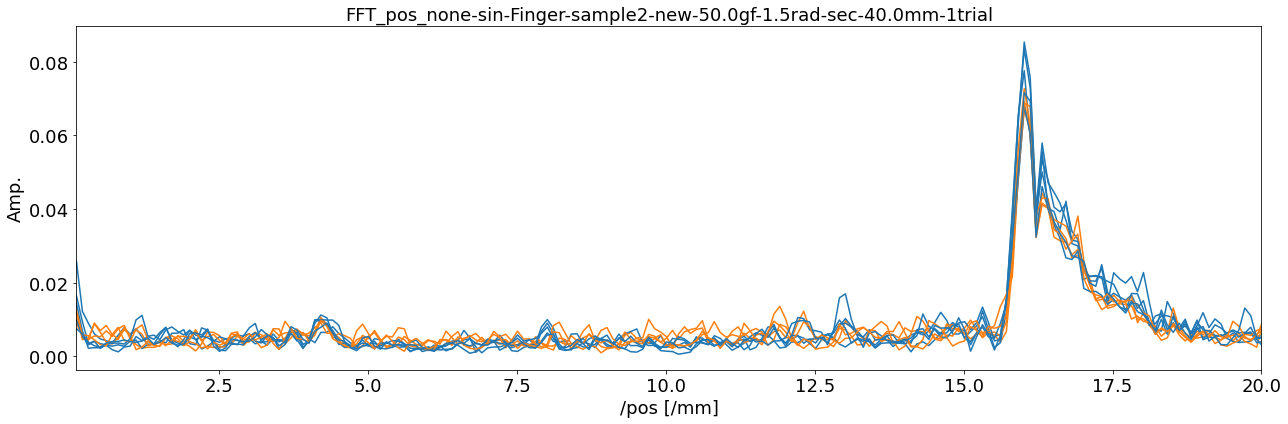

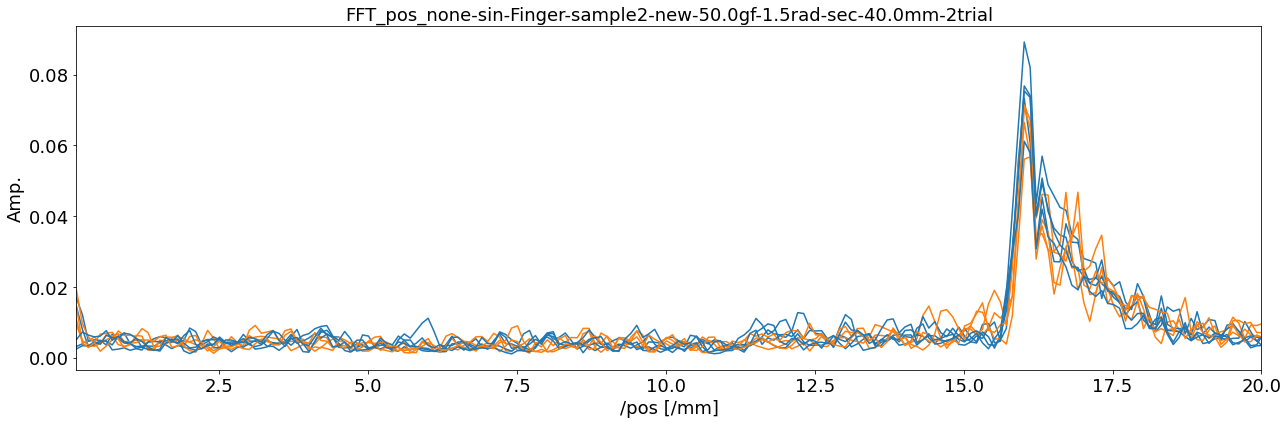

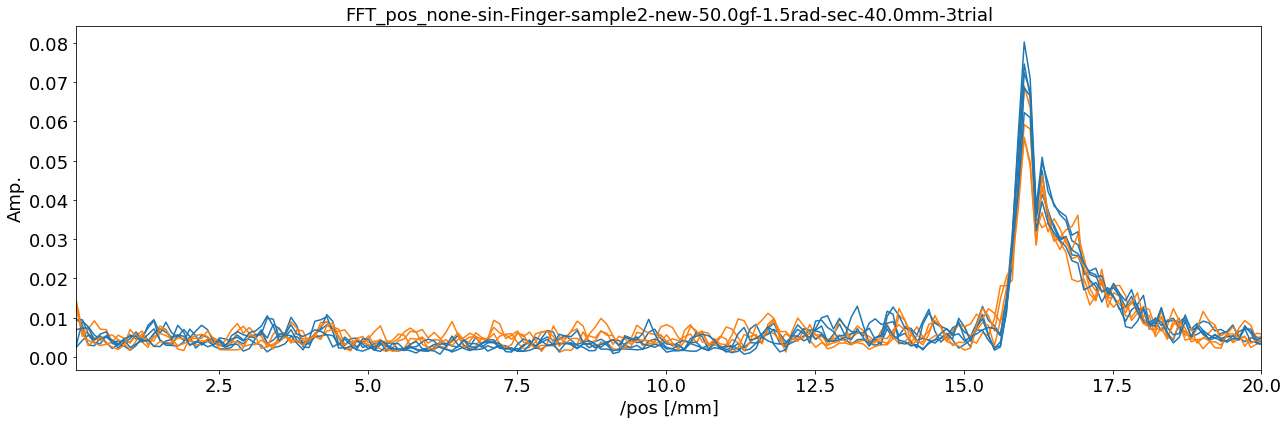

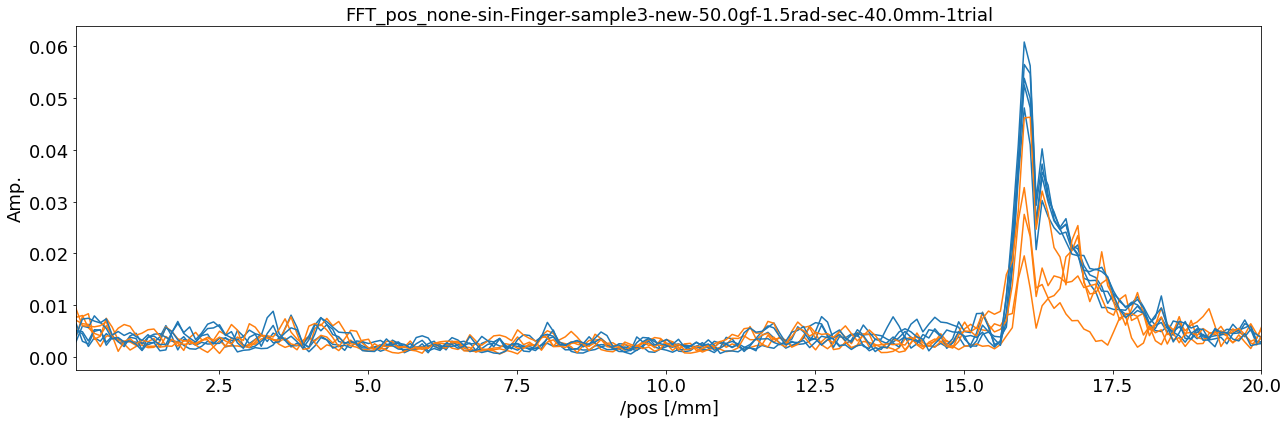

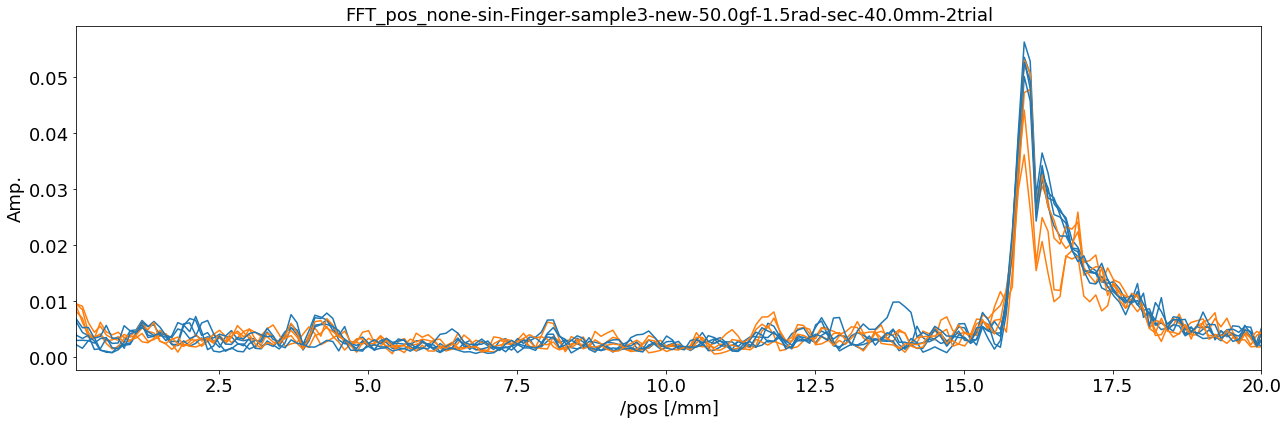

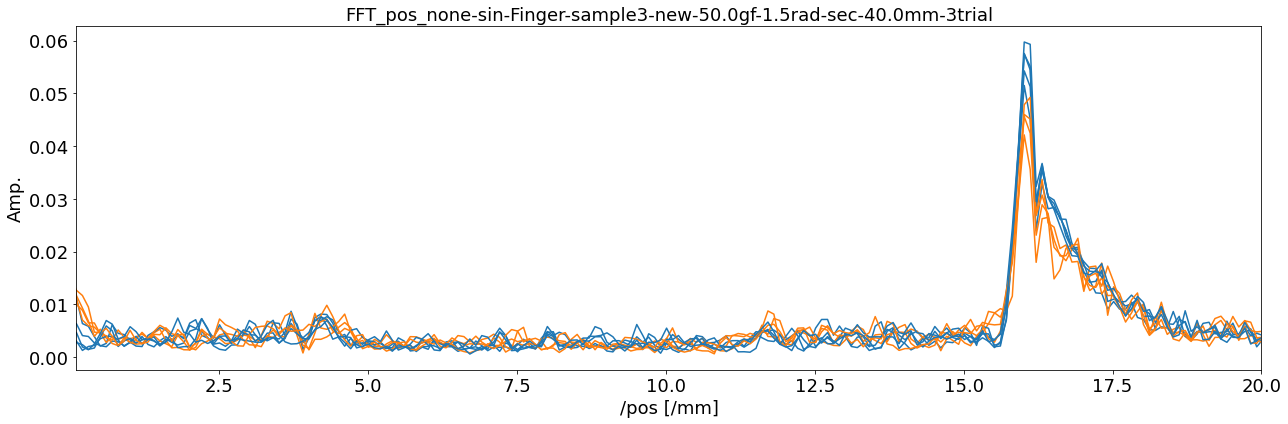

In [4]:
for i in v_data_conditions.index:
    part = list(range(1, v_frictionData[str(i)].times*2))
    v_frictionData[str(i)].plot_fft_pos(part)

#### 位置FFTのピーク

In [3]:
for i in v_data_conditions.index:
    part = list(range(1, v_frictionData[str(i)].times*2))
    v_frictionData[str(i)].toCSV_peak3_fft_pos('20221220_car_noFingerprint_fft_pos_peaks', part)

#### 位置FFT 2,4,6のAmpを抜き出し

In [4]:
for i in v_data_conditions.index:
    part = list(range(1, v_frictionData[str(i)].times*2))
    v_frictionData[str(i)].toCSV_fft_pos_specified('20221220_car_noFingerprint_fft_pos_specified', part, [2,4,6])

#### 摩擦係数，補正済み位置，補正済み速度を出力

In [5]:
for i in v_data_conditions.index:
    v_frictionData[str(i)].toCSV_mu_fittedPos_v('20221220_car_noFingerprint_v-weight_pos_mu_v')

#### 補正済み位置の描画

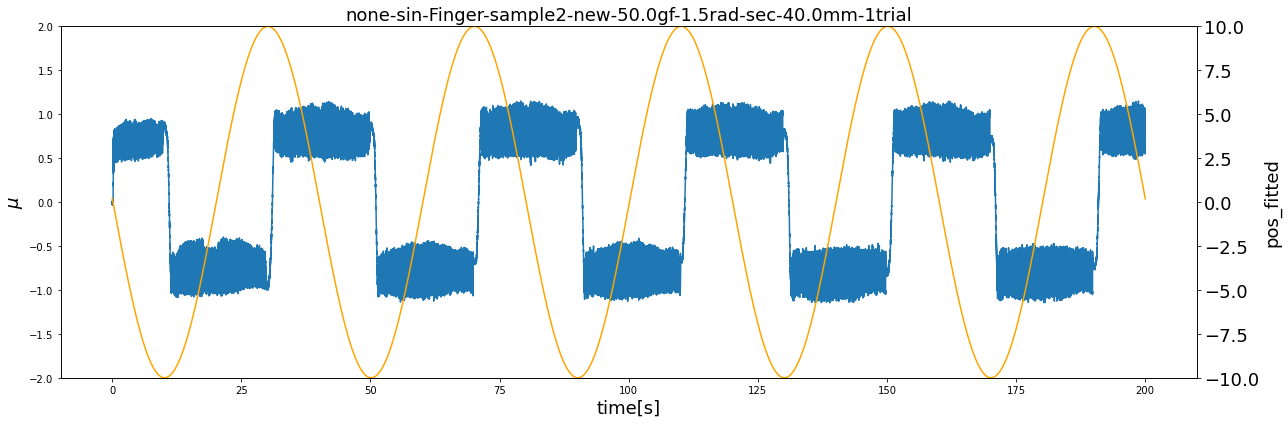

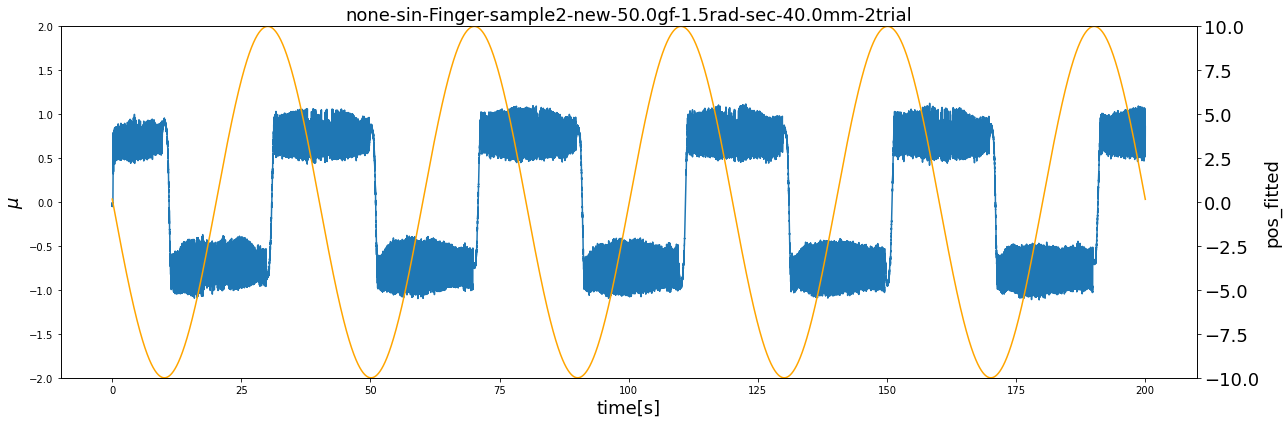

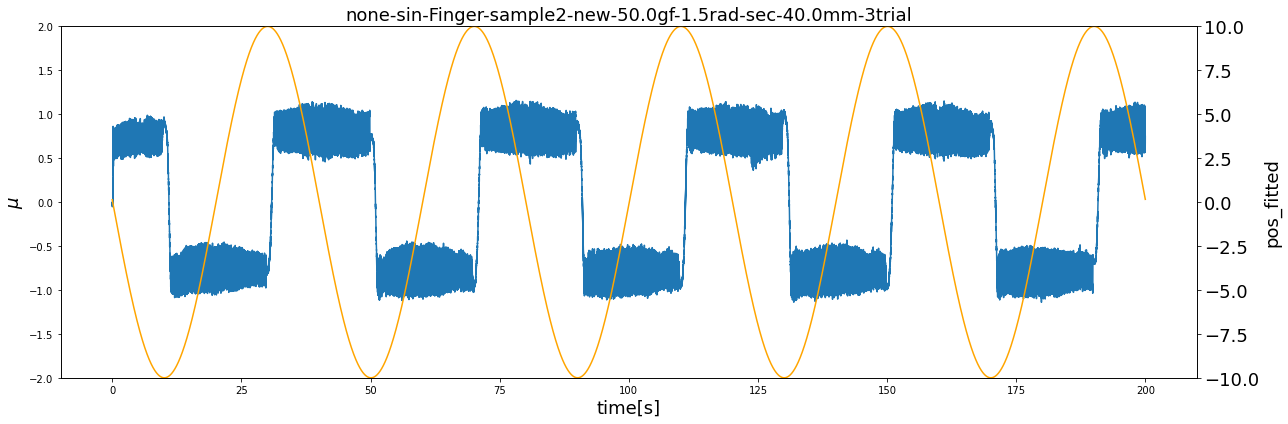

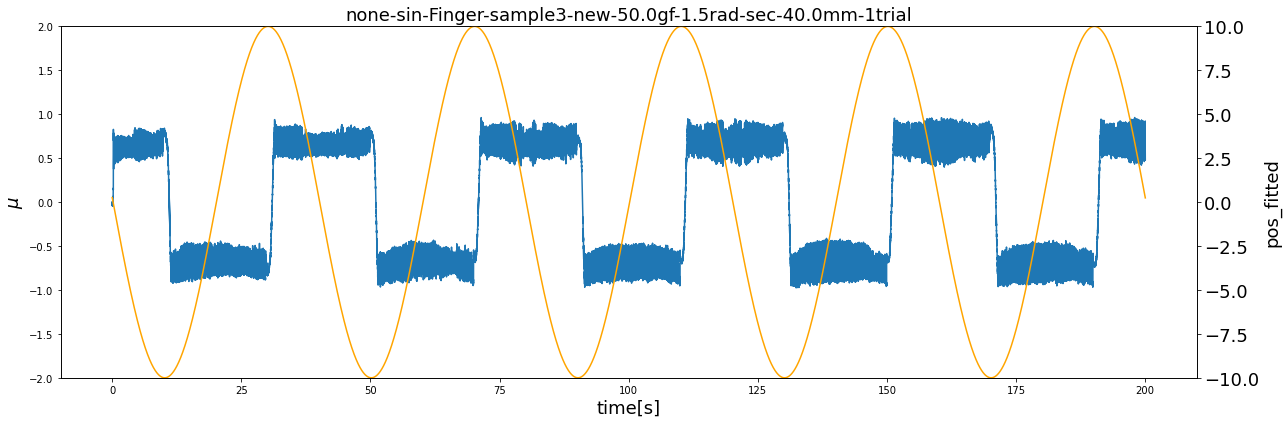

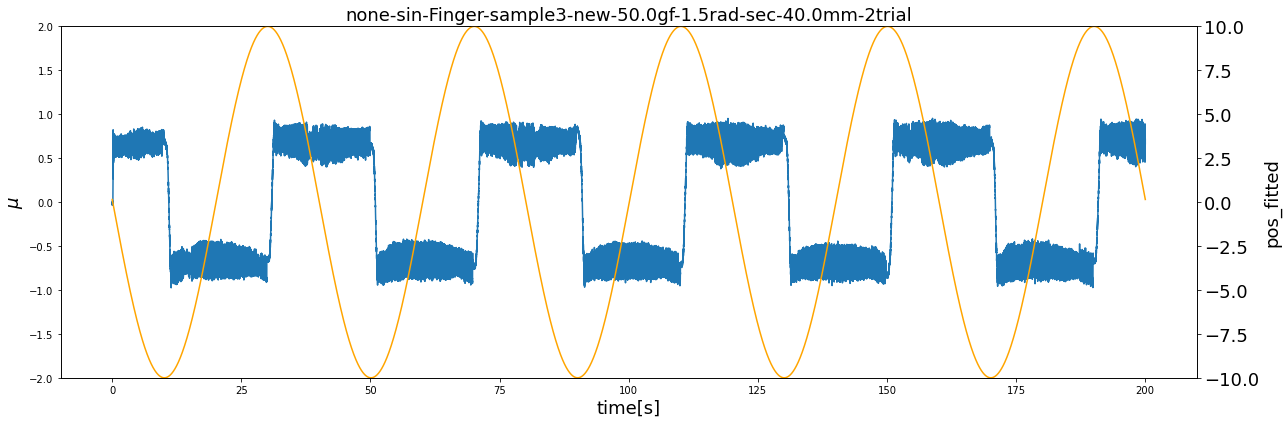

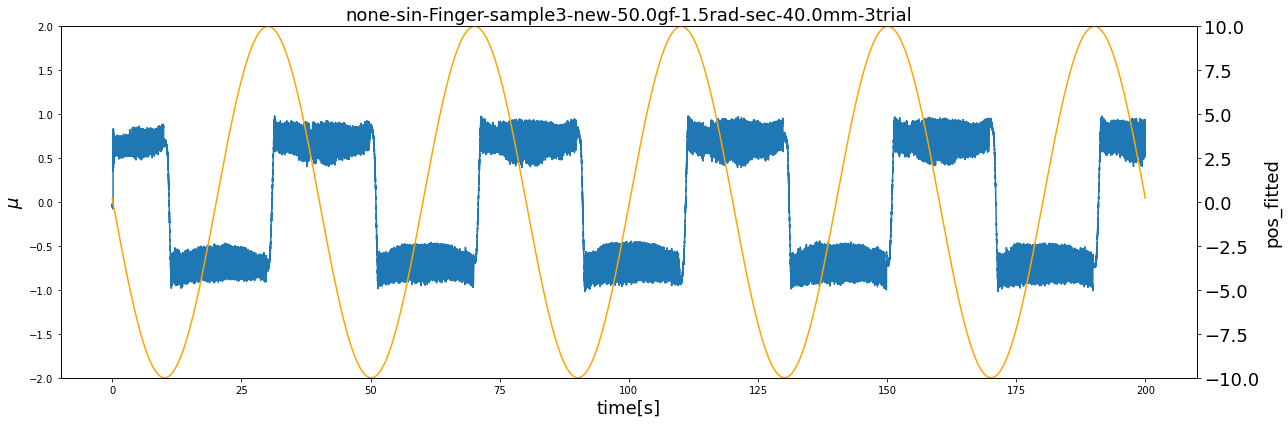

In [3]:
for i in v_data_conditions.index:
     v_frictionData[str(i)].plot_rawData(2)